In [282]:
import sys
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from math import ceil
from tqdm import trange
from subprocess import call
from itertools import islice
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix, dok_matrix

In [2]:
df=pd.read_csv('hackathon_data.csv')
df.dtypes

customer_id                   int64
manufacturer_id               int64
society_id                    int64
city_id                       int64
route_id                      int64
store_id                      int64
order_id                      int64
order_date                   object
category_id                   int64
subcategory_id                int64
product_id                    int64
product_quantity              int64
selling_price_per_unit      float64
total_cost                  float64
subscription                  int64
product_addedtobasket_on     object
dtype: object

In [3]:
len(df)

9678979

In [4]:
df=df.dropna(how='any')

In [5]:
len(df)

9678979

In [265]:
df['order_date']=pd.to_datetime(df['order_date'])
df['product_addedtobasket_on']=pd.to_datetime(df['product_addedtobasket_on'])


KeyError: 'order_date'

In [7]:
df1=df.drop(['order_date','product_addedtobasket_on','selling_price_per_unit','total_cost'],axis=1)
df1

,customer_id,manufacturer_id,society_id,city_id,route_id,store_id,order_id,category_id,subcategory_id,product_id,product_quantity,subscription
0,2698080,1122016,1127168,1120112,1121456,1120112,338048928,1122576,1125264,1120336,4,0
1,1134224,1134336,1120224,1120112,1120336,1120112,337533168,1122576,1125152,1939280,1,1
2,3686704,1150128,1126160,1120112,1123472,1120112,338235520,1123472,1130640,1681456,1,0
3,4045328,1122016,1137360,1120112,1121456,1120112,337818768,1122576,1125264,1120224,3,1
4,3568656,1122016,1120784,1120112,1122576,1120112,338234400,1122576,1125264,1120112,3,0
5,3641008,1122016,1127168,1120112,1121456,1120112,337762096,1122576,1125264,1120112,1,1
6,4921952,1122016,1136016,1120112,1123024,1120112,338003680,1122576,1125264,1120224,2,0
7,2461312,1122016,1121232,1120112,1122688,1120112,338241456,1122576,1125264,2080176,3,0
8,1588384,1134896,1121568,1120112,1122576,1120112,337498448,1122576,1125376,1125488,1,1
9,3058944,1126048,1122128,1120112,1121120,1120112,338231712,1122576,1125376,2199568,2,0


In [8]:
df2=df1[['customer_id','product_id','product_quantity']]
df2.head()

,customer_id,product_id,product_quantity
0,2698080,1120336,4
1,1134224,1939280,1
2,3686704,1681456,1
3,4045328,1120224,3
4,3568656,1120112,3


In [9]:
df2=df2.groupby(['customer_id','product_id']).sum()
df2=pd.DataFrame(df2)
df2.reset_index()

,customer_id,product_id,product_quantity
0,1121904,1120224,17
1,1121904,1120336,52
2,1121904,1120672,1
3,1121904,1120896,11
4,1121904,1124256,7
5,1121904,1133216,4
6,1121904,1360800,1
7,1121904,1367072,1
8,1121904,1379840,1
9,1121904,1414672,4


In [10]:
df_matrix = pd.pivot_table(df2, values='product_quantity', index='customer_id', columns='product_id')
df_matrix

product_id,1120112,1120224,1120336,1120448,1120560,1120672,1120784,1120896,1121008,1121120,...,4193392,4193952,4194064,4194288,4195184,4195744,4201232,4201792,4205488,4214000
customer_id,,,,,,,,,,,,,,,,,,,,,
1121904,NaN,17.0,52.0,NaN,NaN,1.0,NaN,11.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1122016,108.0,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1122128,NaN,NaN,251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1122352,NaN,98.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1123248,NaN,519.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1123696,8.0,178.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1124144,4.0,917.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1124256,NaN,55.0,NaN,NaN,74.0,102.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1124592,NaN,1324.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_matrix_norm = (df_matrix-df_matrix.min())/(df_matrix.max()-df_matrix.min())

In [75]:
d = df_matrix_norm.reset_index() 
d.index.names = ['scaled_purchase_freq'] 
data_norm = pd.melt(d, id_vars=['customer_id'], value_name='scaled_purchase_freq').dropna()
print(data_norm.shape)
data_norm.head(20)

(2757824, 3)


,customer_id,product_id,scaled_purchase_freq
1,1122016,1120112,0.047661
5,1123696,1120112,0.003118
6,1124144,1120112,0.001336
9,1126608,1120112,0.012027
10,1128400,1120112,0.200445
15,1133888,1120112,0.161247
16,1134000,1120112,0.996437
18,1136576,1120112,0.000445
21,1139824,1120112,0.033853
26,1141168,1120112,0.032962


In [111]:
len(data_norm['customer_id'].unique())

30000

In [76]:
def create_matrix(data, users_col, items_col, ratings_col, threshold = None):
    if threshold is not None:
        data = data[data[ratings_col] >= threshold]
        data[ratings_col] = 1
    else:
        data[ratings_col]=-1
    for col in (items_col, users_col, ratings_col):
        data[col] = data[col].astype('category')

    ratings = csr_matrix((data[ratings_col],
                          (data[users_col].cat.codes, data[items_col].cat.codes)))
    ratings.eliminate_zeros()
    return ratings, data

In [83]:
items_col = 'product_id'
users_col = 'customer_id'
ratings_col = 'scaled_purchase_freq'
threshold = 0.3
X, df = create_matrix(data_norm, users_col, items_col, ratings_col, threshold)
X

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<22146x7911 sparse matrix of type '<class 'numpy.int64'>'
	with 75823 stored elements in Compressed Sparse Row format>

In [51]:
class BPR:
    def __init__(self, learning_rate = 0.01, n_factors = 15, n_iters = 10, 
                 batch_size = 1000, reg = 0.01, seed = 1234, verbose = True):
        self.reg = reg
        self.seed = seed
        self.verbose = verbose
        self.n_iters = n_iters
        self.n_factors = n_factors
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        
        # to avoid re-computation at predict
        self._prediction = None
    def fit(self, ratings):
        indptr = ratings.indptr
        indices = ratings.indices
        n_users, n_items = ratings.shape
        
        # ensure batch size makes sense, since the algorithm involves
        # for each step randomly sample a user, thus the batch size
        # should be smaller than the total number of users or else
        # we would be sampling the user with replacement
        batch_size = self.batch_size
        if n_users < batch_size:
            batch_size = n_users
            sys.stderr.write('WARNING: Batch size is greater than number of users,'
                             'switching to a batch size of {}\n'.format(n_users))

        batch_iters = n_users // batch_size
        
        # initialize random weights
        rstate = np.random.RandomState(self.seed)
        self.user_factors = rstate.normal(size = (n_users, self.n_factors))
        self.item_factors = rstate.normal(size = (n_items, self.n_factors))
        
        # progress bar for training iteration if verbose is turned on
        loop = range(self.n_iters)
        if self.verbose:
            loop = trange(self.n_iters, desc = self.__class__.__name__)
        
        for _ in loop:
            for _ in range(batch_iters):
                sampled = self._sample(n_users, n_items, indices, indptr)
                sampled_users, sampled_pos_items, sampled_neg_items = sampled
                self._update(sampled_users, sampled_pos_items, sampled_neg_items)

        return self
        
    def _sample(self, n_users, n_items, indices, indptr):
        """sample batches of random triplets u, i, j"""
        sampled_pos_items = np.zeros(self.batch_size, dtype = np.int)
        sampled_neg_items = np.zeros(self.batch_size, dtype = np.int)
        sampled_users = np.random.choice(
            n_users, size = self.batch_size, replace = False)

        for idx, user in enumerate(sampled_users):
            pos_items = indices[indptr[user]:indptr[user + 1]]
            pos_item = np.random.choice(pos_items)
            neg_item = np.random.choice(n_items)
            while neg_item in pos_items:
                neg_item = np.random.choice(n_items)

            sampled_pos_items[idx] = pos_item
            sampled_neg_items[idx] = neg_item

        return sampled_users, sampled_pos_items, sampled_neg_items
    def _update(self, u, i, j):
        user_u = self.user_factors[u]
        item_i = self.item_factors[i]
        item_j = self.item_factors[j]
        r_uij = np.sum(user_u * (item_i - item_j), axis = 1)
        sigmoid = np.exp(-r_uij) / (1.0 + np.exp(-r_uij))
        
        # repeat the 1 dimension sigmoid n_factors times so
        # the dimension will match when doing the update
        sigmoid_tiled = np.tile(sigmoid, (self.n_factors, 1)).T

        # update using gradient descent
        grad_u = sigmoid_tiled * (item_j - item_i) + self.reg * user_u
        grad_i = sigmoid_tiled * -user_u + self.reg * item_i
        grad_j = sigmoid_tiled * user_u + self.reg * item_j
        self.user_factors[u] -= self.learning_rate * grad_u
        self.item_factors[i] -= self.learning_rate * grad_i
        self.item_factors[j] -= self.learning_rate * grad_j
        return self
    
    def predict(self):
        if self._prediction is None:
            self._prediction = self.user_factors.dot(self.item_factors.T)

        return self._prediction
    
    def _predict_user(self, user):
        user_pred = self.user_factors[user].dot(self.item_factors.T)
        return user_pred
   
    def recommend(self, ratings, N = 5):
        n_users = ratings.shape[0]
        recommendation = np.zeros((n_users, N), dtype = np.uint32)
        for user in range(n_users):
            top_n = self._recommend_user(ratings, user, N)
            recommendation[user] = top_n

        return recommendation

    def _recommend_user(self, ratings, user, N):
        """the top-N ranked items for a given user"""
        scores = self._predict_user(user)

        
        liked = set(ratings[user].indices)
        count = N + len(liked)
        if count < scores.shape[0]:

            
            ids = np.argpartition(scores, -count)[-count:]
            best_ids = np.argsort(scores[ids])[::-1]
            best = ids[best_ids]
        else:
            best = np.argsort(scores)[::-1]

        top_n = list(islice((rec for rec in best if rec not in liked), N))
        return top_n
    
    def get_similar_items(self, N = 5, item_ids = None):
        
        normed_factors = normalize(self.item_factors)
        knn = NearestNeighbors(n_neighbors = N + 1, metric = 'euclidean')
        knn.fit(normed_factors)

       
        if item_ids is not None:
            normed_factors = normed_factors[item_ids]

        _, items = knn.kneighbors(normed_factors)
        similar_items = items[:, 1:].astype(np.uint32)
        return similar_items


                    
    

In [52]:
def create_train_test(ratings, test_size = 0.4, seed = 1234):
    
    assert test_size < 1.0 and test_size > 0.0

    
    train = ratings.copy().todok()
    test = dok_matrix(train.shape)
    
   
    rstate = np.random.RandomState(seed)
    for u in range(ratings.shape[0]):
        split_index = ratings[u].indices
        n_splits = ceil(test_size * split_index.shape[0])
        test_index = rstate.choice(split_index, size = n_splits, replace = False)
        test[u, test_index] = ratings[u, test_index]
        train[u, test_index] = 0
    
    train, test = train.tocsr(), test.tocsr()
    return train, test

In [87]:

X_train, X_test = create_train_test(X, test_size = 0.4, seed = 1234)

In [89]:
bpr_params = {'reg': 0.01,
              'learning_rate': 0.1,
              'n_iters': 160,
              'n_factors': 15,
              'batch_size': 10000}

bpr = BPR(**bpr_params)
bpr.fit(X_test)




BPR:   0%|          | 0/160 [00:00<?, ?it/s]


BPR:   1%|          | 1/160 [00:00<00:46,  3.44it/s]


BPR:   1%|▏         | 2/160 [00:00<00:46,  3.43it/s]


BPR:   2%|▏         | 3/160 [00:00<00:45,  3.42it/s]


BPR:   2%|▎         | 4/160 [00:01<00:45,  3.42it/s]


BPR:   3%|▎         | 5/160 [00:01<00:45,  3.42it/s]


BPR:   4%|▍         | 6/160 [00:01<00:45,  3.42it/s]


BPR:   4%|▍         | 7/160 [00:02<00:44,  3.42it/s]


BPR:   5%|▌         | 8/160 [00:02<00:44,  3.42it/s]


BPR:   6%|▌         | 9/160 [00:02<00:49,  3.07it/s]


BPR:   6%|▋         | 10/160 [00:03<00:55,  2.69it/s]


BPR:   7%|▋         | 11/160 [00:03<00:53,  2.77it/s]


BPR:   8%|▊         | 12/160 [00:03<00:56,  2.61it/s]


BPR:   8%|▊         | 13/160 [00:04<00:57,  2.57it/s]


BPR:   9%|▉         | 14/160 [00:04<00:54,  2.69it/s]


BPR:   9%|▉         | 15/160 [00:05<00:50,  2.89it/s]


BPR:  10%|█         | 16/160 [00:05<00:48,  2.97it/s]


BPR:  11%|█         | 17/160 [00:05<00:46,  3.06it/s]


BPR:  1

In [517]:
l=bpr.get_similar_items(N = 5)
l=pd.DataFrame(l)
l

,0,1,2,3,4
0,5043,3541,2732,4380,6150
1,2094,5876,5416,522,1475
2,3111,4631,3260,3599,6209
3,815,3810,760,3164,1769
4,6558,5699,6446,6139,1577
5,3978,3368,1855,1016,620
6,4035,4934,3609,4217,5485
7,6818,5551,7832,3569,312
8,803,2965,4114,5990,2685
9,1967,6459,2946,345,447


In [235]:
z=bpr.recommend(X_test, N = 10)
z=pd.DataFrame(z)



In [252]:
r=pd.DataFrame(data_norm['product_id'].unique())
q=data_norm['customer_id'].unique()
z.index=q[0:22146]
z
r['index']=r.index
r['product_id']=r[0]
r.drop(['index',0],axis=1,inplace=True)

In [518]:
z=z.replace({0:r.product_id,1:r.product_id,2:r.product_id,3:r.product_id,4:r.product_id,5:r.product_id,6:r.product_id,7:r.product_id,8:r.product_id,9:r.product_id})
l=l.replace({0:r.product_id,1:r.product_id,2:r.product_id,3:r.product_id,4:r.product_id})


In [114]:
def auc_score(model, ratings):
    auc = 0.0
    n_users, n_items = ratings.shape
    for user, row in enumerate(ratings):
        y_pred = model._predict_user(user)
        y_true = np.zeros(n_items)
        y_true[row.indices] = 1
        auc += roc_auc_score(y_true, y_pred)

    auc /= n_users
    return auc
print(auc_score(bpr, X_test))

0.991848118760626


In [120]:
df7=pd.read_csv('hackathon_data.csv',)

In [121]:
len(df7['category_id'].unique())

22

In [124]:
df7=df7[['category_id','product_addedtobasket_on']]
df7['product_addedtobasket_on']=pd.to_datetime(df7['product_addedtobasket_on'])


category_id                          int64
product_addedtobasket_on    datetime64[ns]
dtype: object

In [131]:
df7['category_id']=df7['category_id'].astype('category')

In [162]:
df8=pd.get_dummies(df7)
columns=[df7['category_id'].unique()]
df8.set_index('product_addedtobasket_on')


,category_id_1120000,category_id_1122352,category_id_1122464,category_id_1122576,category_id_1122688,category_id_1122800,category_id_1122912,category_id_1123024,category_id_1123136,category_id_1123248,...,category_id_1123584,category_id_1123696,category_id_1123920,category_id_1124144,category_id_1124368,category_id_1124480,category_id_1124592,category_id_1124704,category_id_1124816,category_id_1125040
product_addedtobasket_on,,,,,,,,,,,,,,,,,,,,,
2018-04-30 16:23:46,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-04-19 01:30:02,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-04-30 22:26:07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-04-23 01:30:03,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-04-30 22:22:57,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-04-25 01:30:03,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-04-30 10:00:47,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-04-30 22:33:59,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-04-20 01:30:03,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [186]:
df9=df8.drop(['product_addedtobasket_on'],axis=1)

In [187]:
df9.index=df8.product_addedtobasket_on

In [188]:
train = df9[:int(0.8*(len(df9)))]
valid = df9[int(0.8*(len(df9))):]

#Fit the model
from statsmodels.tsa.vector_ar.var_model import VAR
model = VAR(endog=train)
model_fit = model.fit()

#make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,22):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

In [285]:
#RFM Analysis


df14=pd.read_csv('hackathon_data.csv')
df14.head()
df15=pd.read_csv('hackathon_data.csv')


In [320]:
df14['order_date']=pd.to_datetime(df14['order_date'])
df14['product_addedtobasket_on']=pd.to_datetime(df14['product_addedtobasket_on'])
df14.order_date.max()
df14.order_date=df14.order_date.astype(str)

In [323]:
def f(row):
    if row['order_date']>'2019-07-30':
        val=5
    elif row['order_date']<='2019-07-30' and row['order_date']>'2019-05-31':
        val=4
    elif row['order_date']<='2019-05-31' and row['order_date']>'2019-03-31':
        val=3
    elif row['order_date']<='2019-03-31' and row['order_date']>'2019-01-31':
        val=2
    else:
        val=1
    return val
df14['Recency_flag']=df14.apply(f,axis=1)
df14=df14.groupby('customer_id',as_index=False)['Recency_flag'].max()

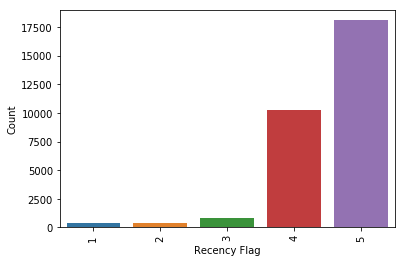

In [324]:
sns.countplot(x='Recency_flag',data=df14)
plt.ylabel('Count')
plt.xlabel('Recency Flag')
plt.xticks(rotation='vertical')
plt.show()

In [286]:
cust_freq=df15[['customer_id','order_id']].drop_duplicates()


In [289]:
cust_freq_count=cust_freq.groupby(['customer_id'])['order_id'].aggregate('count').reset_index().sort_values('order_id', ascending=False)

In [290]:
unique_order=cust_freq_count[['order_id']].drop_duplicates()

In [293]:
unique_order['Freqency_Band'] = pd.qcut(unique_order['order_id'], 5)

In [294]:
unique_order=unique_order[['Freqency_Band']].drop_duplicates()

In [297]:
unique_order

,Freqency_Band
2591,"(362.2, 455.0]"
3879,"(274.4, 362.2]"
8156,"(186.6, 274.4]"
1372,"(98.8, 186.6]"
27749,"(7.999, 98.8]"


In [299]:
def f(row):
    if row['order_id']<=98.8:
        val=1
    elif row['order_id']>98.8 and row['order_id']<=186.6:
        val=2
    elif row['order_id']>186.6 and row['order_id']<=274.4:
        val=3
    elif row['order_id']>274.4 and row['order_id']<=362.2:
        val=4
    else:
        val=5
    return val
cust_freq_count['Freq_flag']=cust_freq_count.apply(f,axis=1)


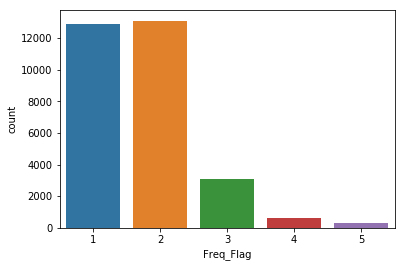

In [300]:
sns.countplot(x='Freq_flag',data=cust_freq_count)
plt.ylabel("count")
plt.xlabel("Freq_Flag")
plt.show()

In [311]:
cust_monetary=df15.groupby(['customer_id'])['total_cost'].aggregate("sum").reset_index().sort_values('total_cost',ascending=False)

In [312]:
unique_price=cust_monetary[['total_cost']].drop_duplicates()

In [313]:
unique_price['monetary_band'] = pd.qcut(unique_price['total_cost'], 5)

In [314]:
unique_price=unique_price[['monetary_band']].drop_duplicates()
unique_price

,monetary_band
27693,"(19967.74, 121208.24]"
5227,"(15365.312, 19967.74]"
3893,"(12218.711, 15365.312]"
14504,"(9387.354, 12218.711]"
27580,"(2457.4489999999996, 9387.354]"


In [317]:
def f(row):
    if row['total_cost']<=9387.354:
        val=1
    elif row['total_cost']<=12218.711 and row['total_cost']>9387.354:
        val=2
    elif row['total_cost']<=15365.312 and row['total_cost']>12218.711:
        val=3
    elif row['total_cost']<=19967.74 and row['total_cost']>15365.312:
        val=4
    else:
        val=5
    return val
cust_monetary['monetary_flag']=cust_monetary.apply(f,axis=1)


    

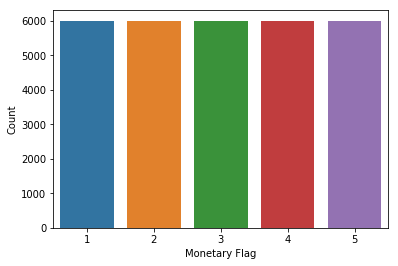

In [318]:
sns.countplot(x='monetary_flag',data=cust_monetary)
plt.xlabel("Monetary Flag")
plt.ylabel("Count")
plt.show()

In [484]:
cust_all=pd.merge(df14,cust_freq_count[['customer_id','Freq_flag']],on=['customer_id'],how='left')
cust_all=pd.merge(cust_all,cust_monetary[['customer_id','monetary_flag']],on=['customer_id'],how='left')
cust_all

,customer_id,Recency_flag,Freq_flag,monetary_flag
0,1121904,4,1,1
1,1122016,1,2,3
2,1122128,5,2,1
3,1122352,5,2,2
4,1123248,5,2,4
5,1123696,5,4,5
6,1124144,5,4,5
7,1124256,5,2,5
8,1124592,5,5,5
9,1126608,5,4,5


In [483]:
#Customer Persuasion for Subscription

cust_all_1['customer_id']=cust_all['customer_id']
cust_all_1['Sub_flag']=cust_all['Freq_flag']*cust_all['monetary_flag']
cust_all_1['subscription']=df15['subscription']

cust_all_1=pd.DataFrame(cust_all_1)
cust_all_1=cust_all_1.sort_values(['Sub_flag','subscription'],ascending=[False,True])
cust_all_1=cust_all_1.drop(['level_0'],axis=1)
cust_all_1=cust_all_1.reset_index()

cust_all_1
   



,level_0,index,Sub_flag,subscription,customer_id,Recency_flag,Refreq,points
0,13,2284,25,0,1129296,5,5,6
1,16,4611,25,0,1134000,2,4,12
2,27,1137,25,0,1142176,5,5,17
3,29,1186,25,0,1143520,5,4,7
4,30,2487,25,0,1144080,5,5,15
5,41,8300,25,0,1155392,4,0,15
6,54,210,25,0,1163792,4,0,2
7,71,5790,25,0,1176672,5,4,10
8,73,6653,25,0,1179696,5,5,6
9,90,13976,25,0,1194816,5,4,12


In [374]:
#Recency Offers
cust_all_2=pd.DataFrame([])
cust_all_2['customer_id']=cust_all['customer_id']
cust_all_2['Recency_flag']=cust_all['Recency_flag']
cust_all_2['monetary_flag']=cust_all['monetary_flag']

cust_all_2=cust_all_2.sort_values(['Recency_flag','monetary_flag'],ascending=[False,True])
cust_all_2

#Use BPR to know which products to push towards them

,customer_id,Recency_flag,monetary_flag
2,1122128,5,1
143,1265040,5,1
262,1399776,5,1
405,1585024,5,1
416,1595440,5,1
602,1811264,5,1
611,1819328,5,1
619,1824256,5,1
649,1867488,5,1
717,1958656,5,1


In [436]:
colNames = df16.columns.tolist()
uniqueValsList = []                    

for each in colNames:
    uniqueVals = list(df16[each].unique())
    uniqueValsList.append(pd.Series(data=uniqueVals,name=each))

from IPython.display import HTML, display
import tabulate
listOfLists = []
for i in range(len(uniqueValsList)):
    thisList = []
    thisList.append(colNames[i])
    for each in uniqueValsList[i].tolist():
        thisList.append(each)
    listOfList.append(thisList)

display(HTML(tabulate.tabulate(listOfLists, tablefmt='html')))


ModuleNotFoundError: No module named 'tabulate'

In [438]:
conda install -c conda-forge tabulate

Solving environment: done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs:
    - tabulate


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    certifi-2019.6.16          |           py37_1         149 KB  conda-forge
    conda-4.7.10               |           py37_0         3.0 MB  conda-forge
    conda-package-handling-1.4.0|           py37_0         261 KB  conda-forge
    openssl-1.1.1c             |       h01d97ff_0         1.9 MB  conda-forge
    tabulate-0.8.3             |             py_0          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.4 MB

The following NEW packages will be INSTALLED:

  conda-package-han~ conda-forge/osx-64::conda-package-handling-1.4.0-py37_0
  tabul

In [464]:
customer_table=df15[['customer_id','society_id','city_id']]
customer_table.drop_duplicates(subset='customer_id',inplace=True)
customer_table=customer_table.reset_index()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [463]:
product_table=df15[['product_id','category_id','subcategory_id','manufacturer_id','selling_price_per_unit']]
product_table.drop_duplicates(subset='product_id',inplace=True)
product_table=product_table.reset_index()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [466]:
order_table=df15[['order_id','route_id','store_id','order_date','product_quantity','total_cost','product_addedtobasket_on','customer_id','product_id','subscription']]


In [467]:
customer_table.to_csv('customer_table.csv')
product_table.to_csv('product_data.csv')
order_table.to_csv('order_table.csv')


In [475]:
z.columns=['r1','r2','r3','r4','r5','r6','r7','r8','r9','r10']
z1=z
z1.reset_index()
z1.columns=['customer_id','r1','r2','r3','r4','r5','r6','r7','r8','r9','r10']

,index,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10
0,1122016,3082912,1687616,1905680,2842336,2411024,1419488,2188592,1682128,2951088,1694000
1,1123696,1725696,3948896,2814336,2366896,1900752,1869728,2418528,2291632,2424128,2943024
2,1124144,2164512,1729168,2524816,2798768,1865584,2580704,2110528,1700272,2224320,1557584
3,1126608,4187904,3083136,1548960,2803360,1135568,1666896,1940512,1534624,3125808,2876272
4,1128400,3066224,1729280,3772272,1693104,2852192,1725472,2158688,4073888,1694112,2930256
5,1133888,1948128,1685040,2110304,2842448,1922592,2521792,2129008,1728944,3931648,1681456
6,1134000,1907024,2083536,2847152,2414048,1413888,2061696,3487344,2041648,1490048,1377824
7,1136576,1666896,2271136,2189040,1477280,1383872,1534624,3554432,2725296,1662976,1531600
8,1139824,1639680,2098096,3083136,1597904,3491488,2754752,2459632,2445072,3483536,2373168
9,1141168,2578016,2953216,2548112,2306640,2424912,1650768,1545824,2232832,1676528,1429120


In [476]:
z1.to_csv('BPM2.csv')

In [485]:
cust_all.to_csv('cust_all.csv')
cust_all_1.to_csv('persuade.csv')
cust_all_2.to_csv('recency.csv')

In [489]:
cust3=cust_all_2.drop(['customer_id'],axis=1)
cust3.reset_index()


,index,Recency_flag,monetary_flag
0,2,5,1
1,143,5,1
2,262,5,1
3,405,5,1
4,416,5,1
5,602,5,1
6,611,5,1
7,619,5,1
8,649,5,1
9,717,5,1


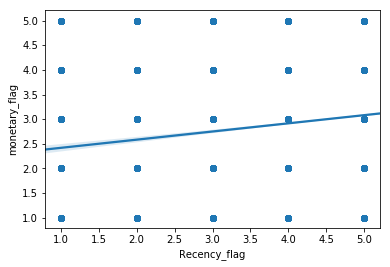

In [495]:
sns.regplot(x=cust3.Recency_flag,y=cust3.monetary_flag,data=cust3)

In [504]:
c1=cust_all.drop(['customer_id'],axis=1)
c1

,Recency_flag,Freq_flag,monetary_flag
0,4,1,1
1,1,2,3
2,5,2,1
3,5,2,2
4,5,2,4
5,5,4,5
6,5,4,5
7,5,2,5
8,5,5,5
9,5,4,5


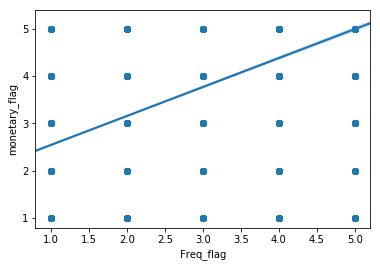

In [515]:
sns.regplot(x=c1.Freq_flag,y=c1.monetary_flag,data=c1)

In [ ]:
#For product-product recommendation:
#Just execute l[{{product_id}}]
#Output is the similar product_id codes